# Neural Network Classification with Tensorflow - Exercises

In [1]:
import tensorflow as tf
print(tf.__version__)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles

2.12.0


### 1) Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 

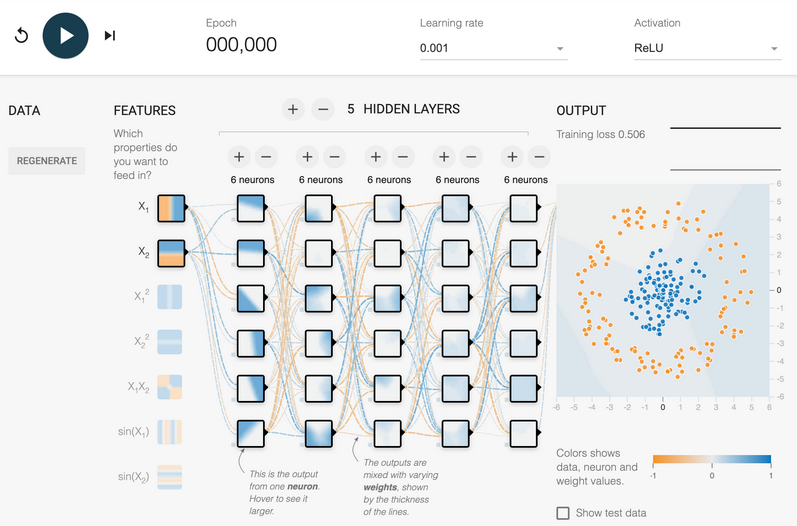

In [22]:
# Create a data from sklearn datasets (make_circles)
n_samples = 1000

X, y = make_circles(n_samples=n_samples, noise=0.13, random_state=42, factor=0.2)

In [29]:
# Check the first element of X
X[0], y[0]

(array([0.1148204 , 0.15100094]), 1)

In [25]:
# Return the data to dataframe
df = pd.DataFrame({'X1': X[:, 0],
              'X2': X[:, 1],
              'label': y})

df.head()

,X1,X2,label
0,0.114820,0.151001,1
1,-0.053514,0.132840,1
2,-0.292457,0.341467,1
3,-0.315287,0.046724,1
4,0.459181,-0.887784,0


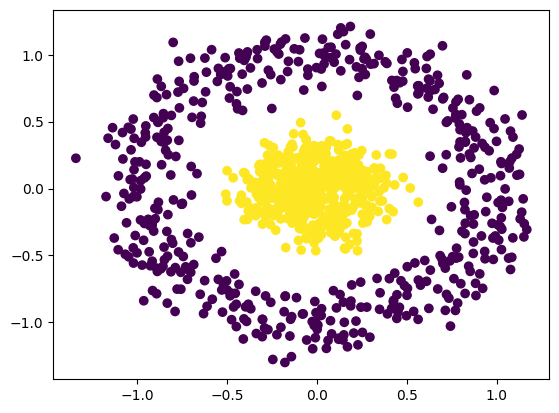

In [28]:
# Plot the data
plt.scatter(df['X1'], df['X2'], c=df['label'])
plt.show()

Yes, that is what I want. As you see, nearly same the given example.. Let's start the create model. In the given example, there are 5 hiddin layer and each hidden layer has 6 hidden units(neuron). 

In [32]:
# Check the shape of X and y
X.shape, y.shape

((1000, 2), (1000,))

In [45]:
# Divide data into train and test set
X_train, X_test = X[0:800], X[800:]
y_train, y_test = y[0:800], y[800:]

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (800, 2)
X test shape: (200, 2)
y train shape: (800,)
y test shape: (200,)


In [46]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Fit the model
history = model.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 4ms/step - loss: 0.5133 - accuracy: 0.8288
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9912
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9975
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9937
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9987
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 7.3587e-04 - accuracy: 1.0000
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 0.9962
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9975
Epoch 11/25
25/

Creating the `plot_decision_boundary` funtion that used for show the decision boundary

In [55]:
# import numpy
import numpy as np

# plot_decision_boundary function
def plot_decision_boundary(model, X, y):
  '''
  Plots the decision boundary created by a model predicting on X
  '''

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check fro multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classification')
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


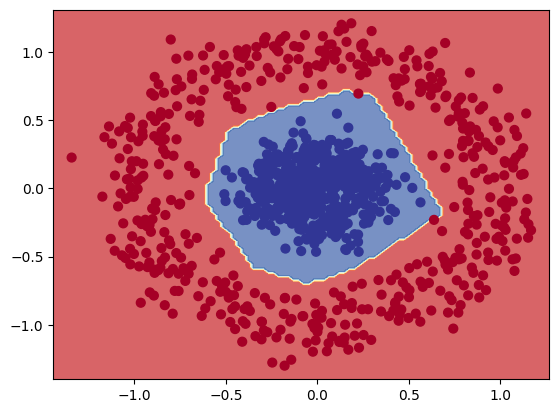

In [58]:
plot_decision_boundary(model, X, y)
plt.show()

In [52]:
# Model evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Model loss:', round(test_loss, 3))
print('Model accuray:', round(test_accuracy, 3))

Model loss: 0.007
Model accuray: 0.995


Our model and accuracy score looks cool for this example. Actually, it is a easy problem for deep learning. Let's go to another question and keep training...

### 2) Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [59]:
# Creating the data from sklearn make_moons()
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

In [60]:
# Check the first element of X and y
X[0], y[0]

(array([-0.11166654,  0.52022374]), 1)

In [61]:
# Return the data to dataframe
df_moon = pd.DataFrame({'x1': X[:, 0],
                        'x2': X[:, 1],
                        'label': y})

df_moon.head()

,x1,x2,label
0,-0.111667,0.520224,1
1,1.142650,-0.342577,1
2,0.795558,-0.011442,1
3,0.111827,-0.551932,1
4,-0.816466,0.543996,0


Data looks like same as before example. Let's plot the data and see how is like.

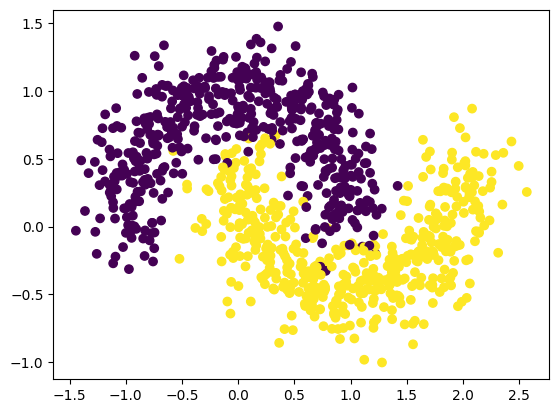

In [63]:
# Plot the data 
plt.scatter(df_moon['x1'], df_moon['x2'], c=df_moon['label'])
plt.show()

Hmmm. This data is more complex than before data. Let's create a model but before we need to divide our data into train and test set..

In [65]:
# Divide data into train and test sets
X_train, X_test = X[0:800], X[800:]
y_train, y_test = y[0:800], y[800:]

print('X train shape:', X_train.shape)
print('X test shape:', X_test.shape)
print('y train shape:', y_train.shape)
print('y test shape:', y_test.shape)

X train shape: (800, 2)
X test shape: (200, 2)
y train shape: (800,)
y test shape: (200,)


In [79]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_moon = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_moon.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['accuracy']
)

# Fit the model
history = model_moon.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 2s 4ms/step - loss: 0.5968 - accuracy: 0.7088
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.4814 - accuracy: 0.8450
Epoch 3/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3968 - accuracy: 0.8637
Epoch 4/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3504 - accuracy: 0.8888
Epoch 5/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3200 - accuracy: 0.8975
Epoch 6/25
25/25 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.9050
Epoch 7/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2827 - accuracy: 0.9112
Epoch 8/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2695 - accuracy: 0.9125
Epoch 9/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2532 - accuracy: 0.9212
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.2410 - accuracy: 0.9275
Epoch 11/25
25/25 [

Train accuracy is 0.96 and it looks good. Let's evaluate with test set and see the results.

In [82]:
# Evaluate the model
loss, accuracy = model_moon.evaluate(X_test, y_test, verbose=0)

print('Model test loss:', round(loss, 3))
print('Model test accuracy:', round(accuracy, 3))

Model test loss: 0.099
Model test accuracy: 0.97


313/313 [==============================] - 1s 1ms/step
doing binary classification


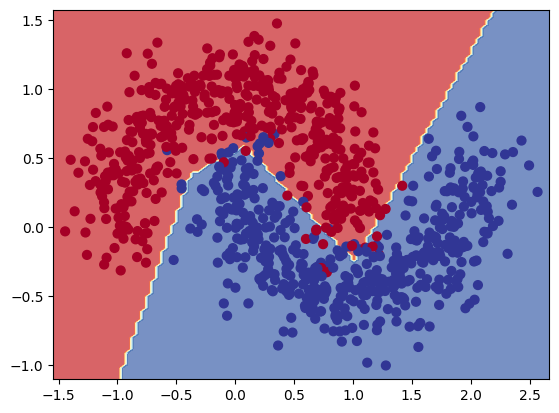

In [81]:
plot_decision_boundary(model_moon, X, y)
plt.show()

Yeah. We get 0.97 accuracy on the test data set and as you see above, decision boudary looks cool. 